**Assignment 4 Report: Perceptron Learning Approaches**

**Name:** Shivam Pawar\
**Course:** MATH-485


---

## Introduction

This assignment explores two approaches to Perceptron learning: the Heuristic Perceptron and the Gradient Descent Perceptron. Both are implemented and analyzed on a 2D binary classification dataset. The dataset contains 100 samples with two numerical features and a binary target.

---

## Part 1: Heuristic Perceptron

### Code Snippet

```python
class HeuristicPerceptron:
    def __init__(self, eta=0.1, max_iter=1000):
        self.eta = eta
        self.max_iter = max_iter
        self.w = None
        self.b = None
        self.boundaries = []

    def _init_weights(self, X):
        n_features = X.shape[1]
        self.w = np.random.normal(loc=0.0, scale=0.01, size=n_features)
        self.b = np.random.normal(loc=0.0, scale=0.01)
        self.boundaries.append((self.w.copy(), self.b, 'initial'))

    def fit(self, X, y):
        self._init_weights(X)
        iterations = 0
        errors = True
        while errors and iterations < self.max_iter:
            errors = False
            for xi, target in zip(X, y):
                prediction = self.predict(xi.reshape(1, -1))[0]
                if prediction != target:
                    update = self.eta * (target - prediction)
                    self.w += update * xi
                    self.b += update
                    errors = True
            if errors:
                self.boundaries.append((self.w.copy(), self.b, 'intermediate'))
            iterations += 1
        self.boundaries.append((self.w.copy(), self.b, 'final'))
        return iterations
```

### Visualizations and Analysis

**Figure 1: Dataset Visualization**

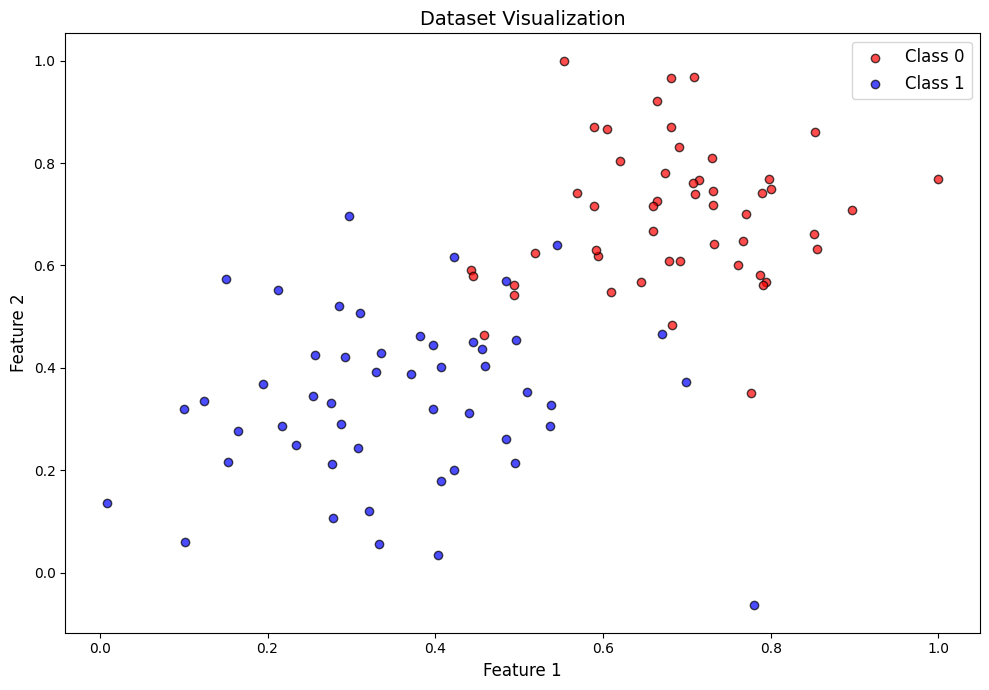

- Red points: Class 0, Blue points: Class 1
- Data is linearly separable and suitable for a perceptron.

**Figure 2: Heuristic Perceptron (lr=0.01)**

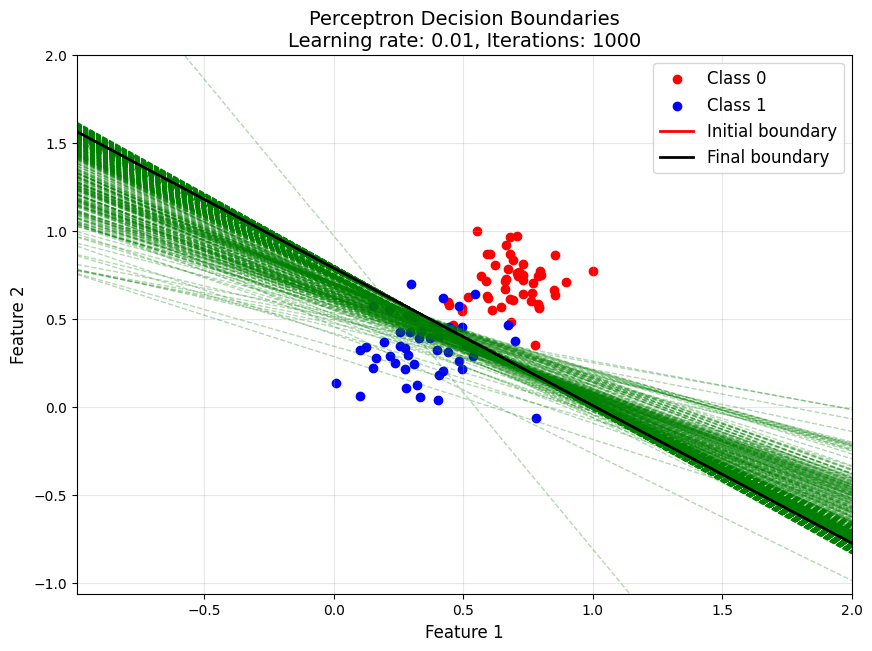

- Very slow learning. Many small updates.
- Final boundary is accurate but convergence is slow.

**Figure 3: Heuristic Perceptron (lr=0.1)**

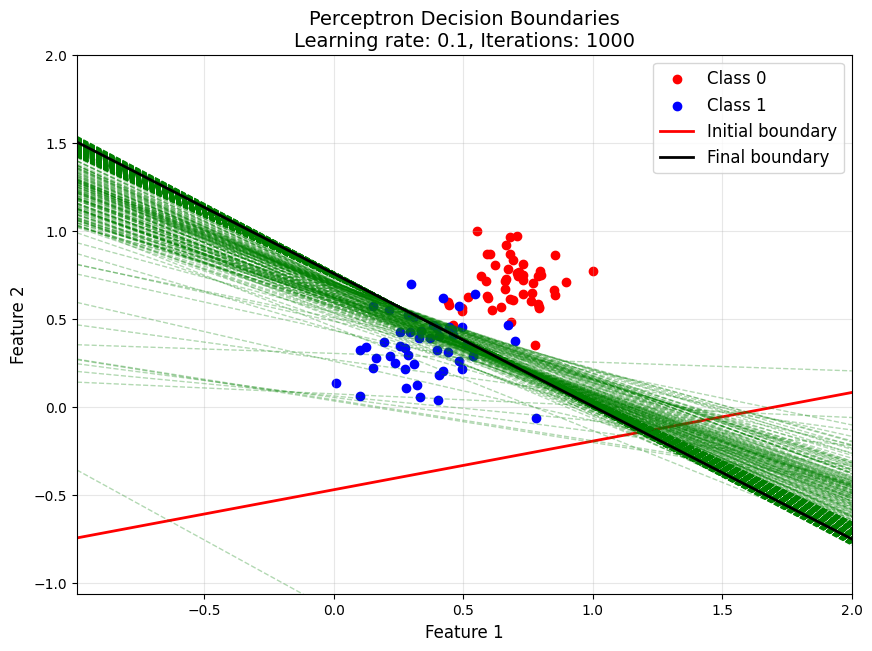

- Faster convergence. Fewer intermediate updates.
- Final boundary is clear and balanced. Optimal result.

**Figure 4: Heuristic Perceptron (lr=1.0)**

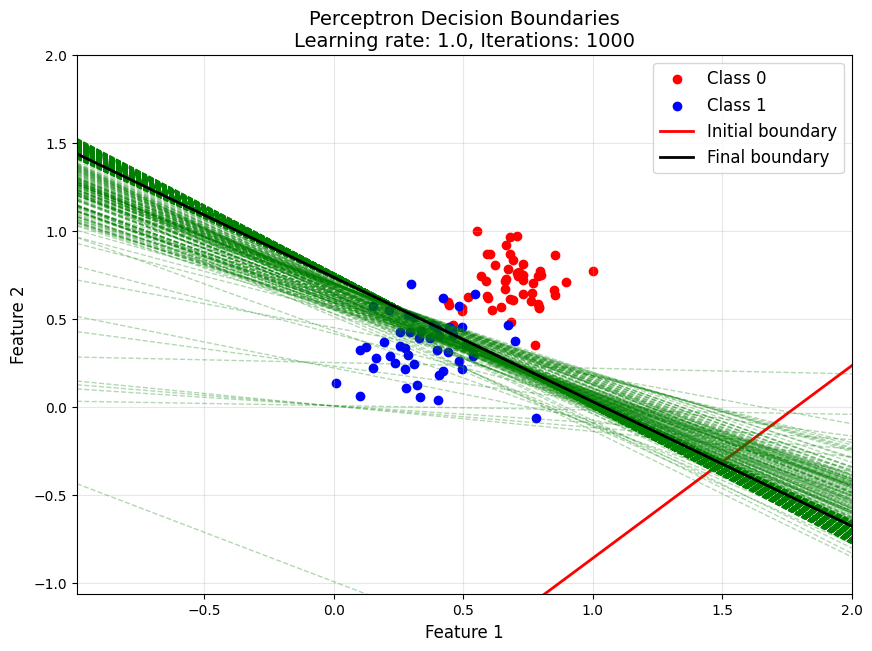

- Aggressive jumps in boundaries.
- Converged quickly, but less stable during training.

### Results Table

| Learning Rate | Iterations | Final Weights       | Final Bias |
| ------------- | ---------- | ------------------- | ---------- |
| 0.01          | 1000       | [-0.0885, -0.1132]  | 0.0891     |
| 0.1           | 1000       | [-0.8096, -1.0734]  | 0.8111     |
| 1.0           | 1000       | [-7.7065, -10.8941] | 8.0098     |

---

## Part 2: Gradient Descent Perceptron

### Code Snippet

```python
class GradientDescentPerceptron:
    def __init__(self, eta=0.1, n_epochs=100):
        self.eta = eta
        self.n_epochs = n_epochs
        self.w = None
        self.b = None
        self.boundaries = []
        self.cost_history = []
        self.epoch_records = []

    def fit(self, X, y):
        self._init_weights(X)
        n_samples = X.shape[0]
        self.cost_history.append(self.compute_cost(X, y))
        self.epoch_records.append(0)
        for epoch in range(1, self.n_epochs + 1):
            output = self.activation(X)
            error = output - y
            grad_w = np.dot(X.T, error) / n_samples
            grad_b = np.sum(error) / n_samples
            self.w -= self.eta * grad_w
            self.b -= self.eta * grad_b
            if epoch % 10 == 0:
                self.cost_history.append(self.compute_cost(X, y))
                self.epoch_records.append(epoch)
        self.boundaries.append((self.w.copy(), self.b, 'final'))
```

### Visualizations and Analysis

**Figure 5–6: GD Perceptron (lr=0.01)**

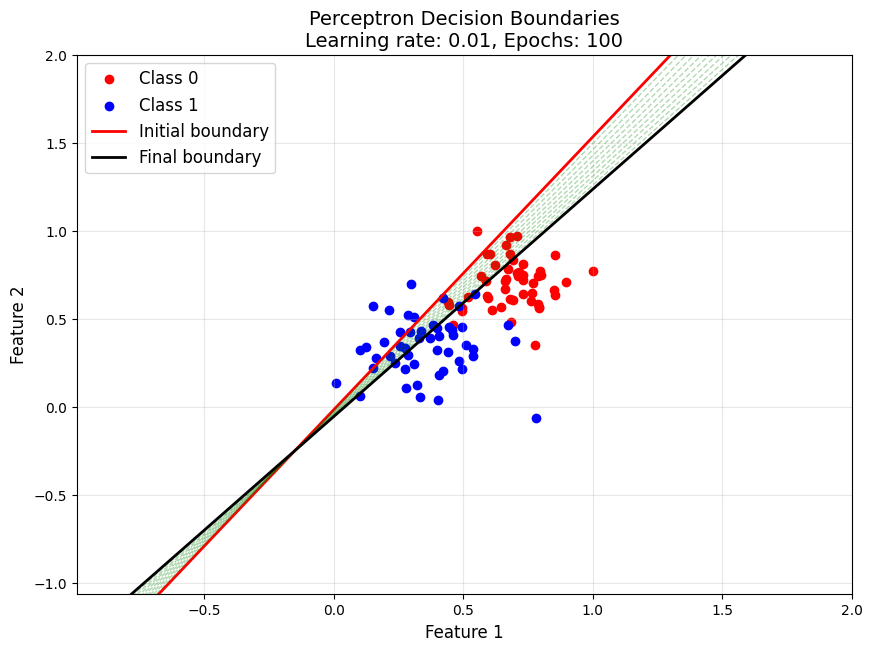
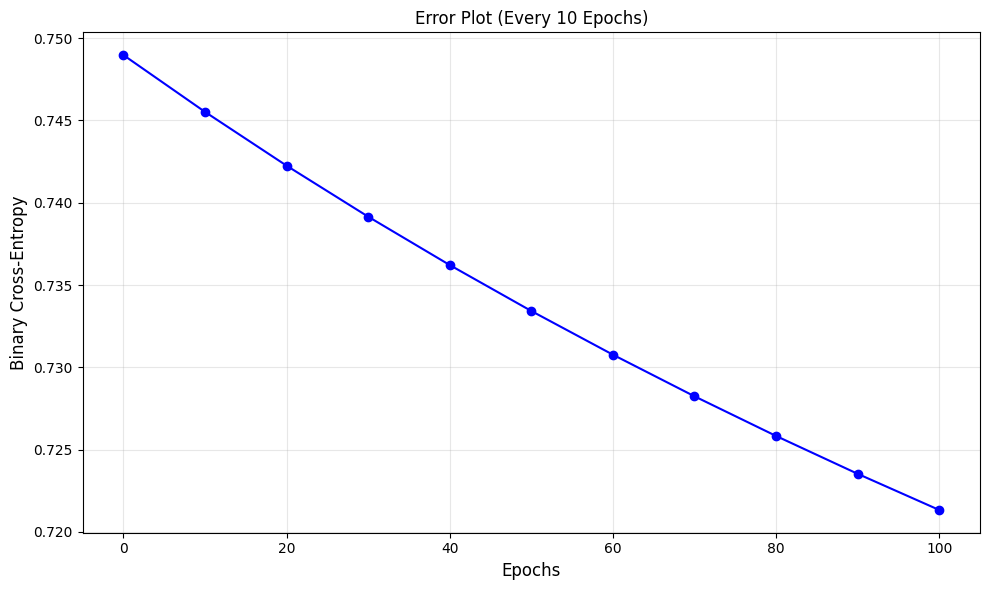

- Boundary updates are slow and subtle.
- Loss decreases slowly but steadily.

**Figure 7–8: GD Perceptron (lr=0.1)**

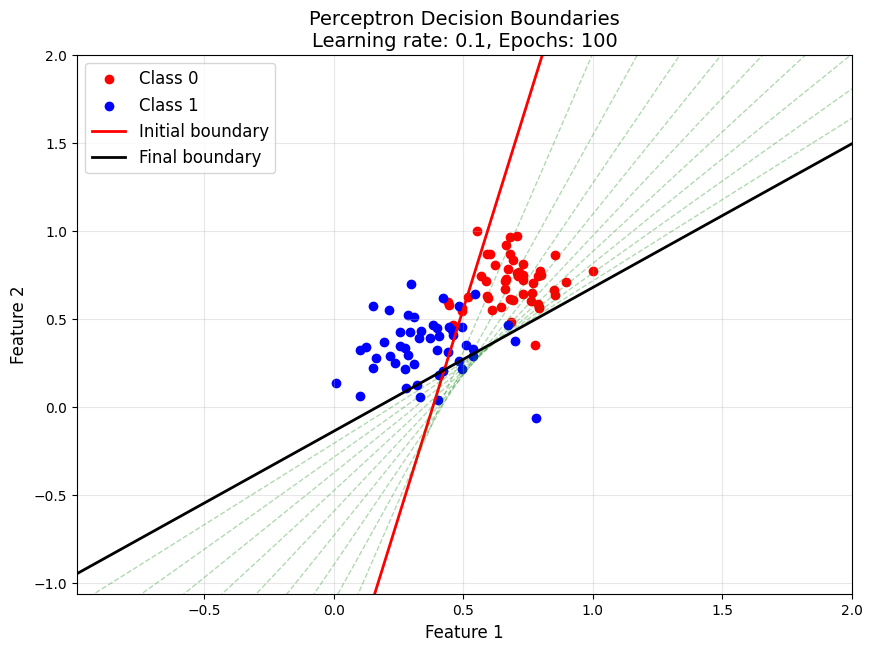
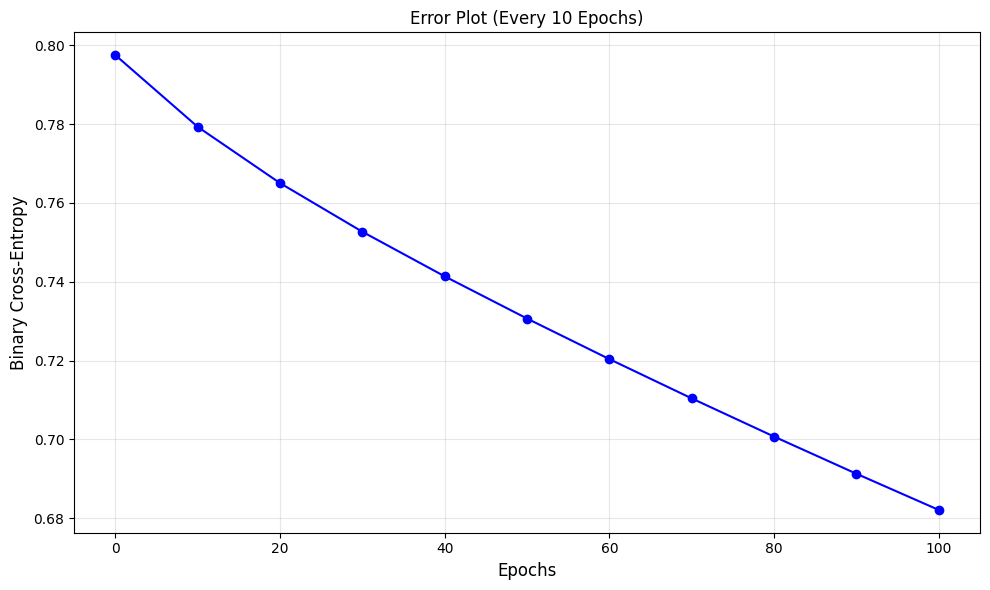

- Good trade-off between speed and stability.
- Fast and stable convergence.

**Figure 9–10: GD Perceptron (lr=1.0)**

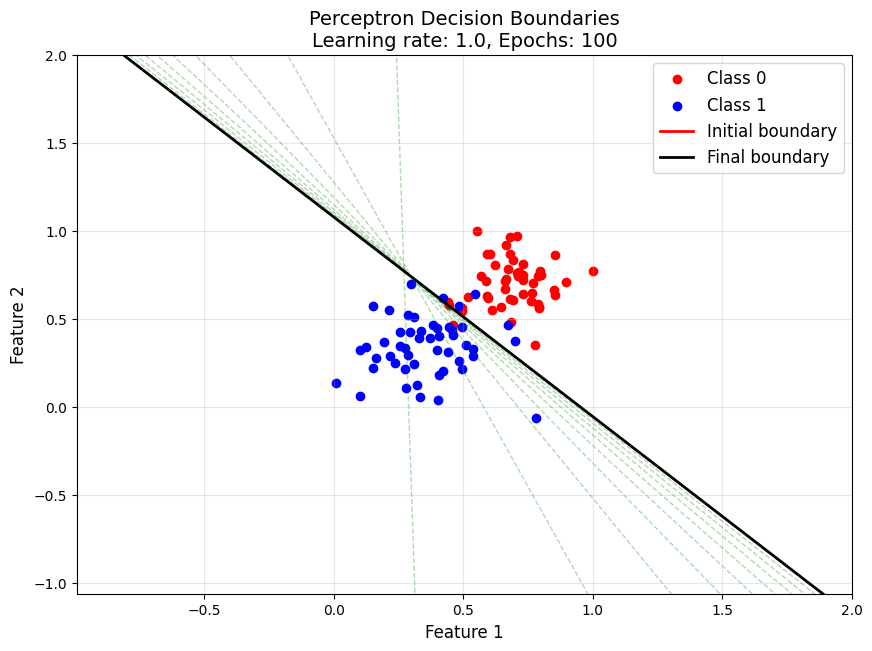
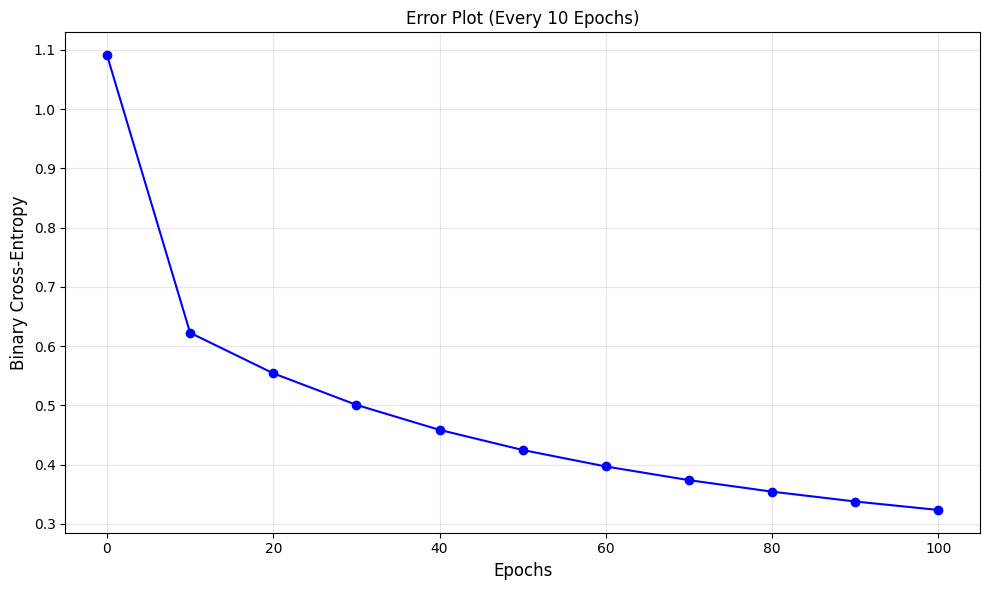

- Fast learning, but less smooth.
- Risk of instability if data were noisy.

**Figure 11–14: Epoch Comparison (lr=0.1)**

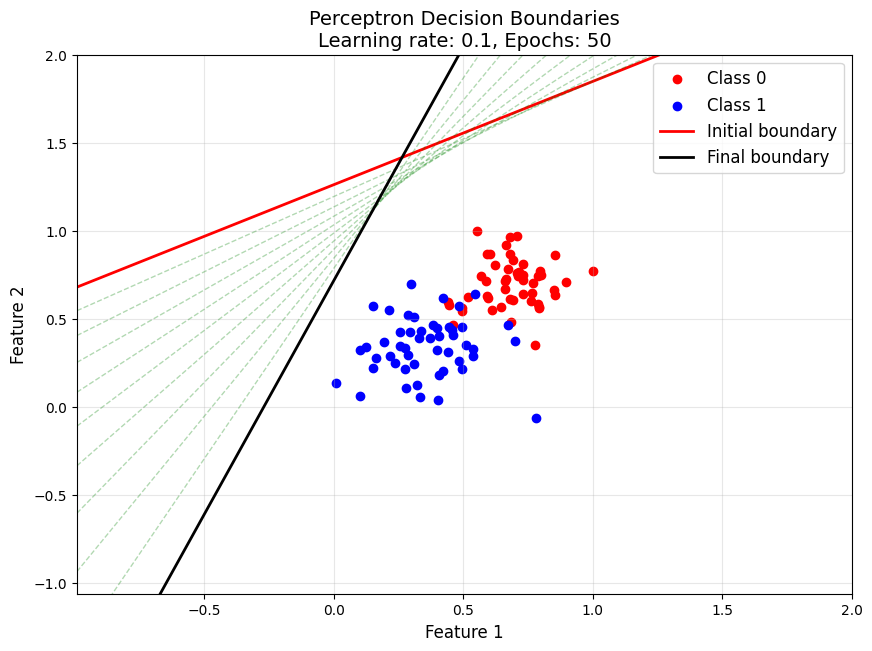
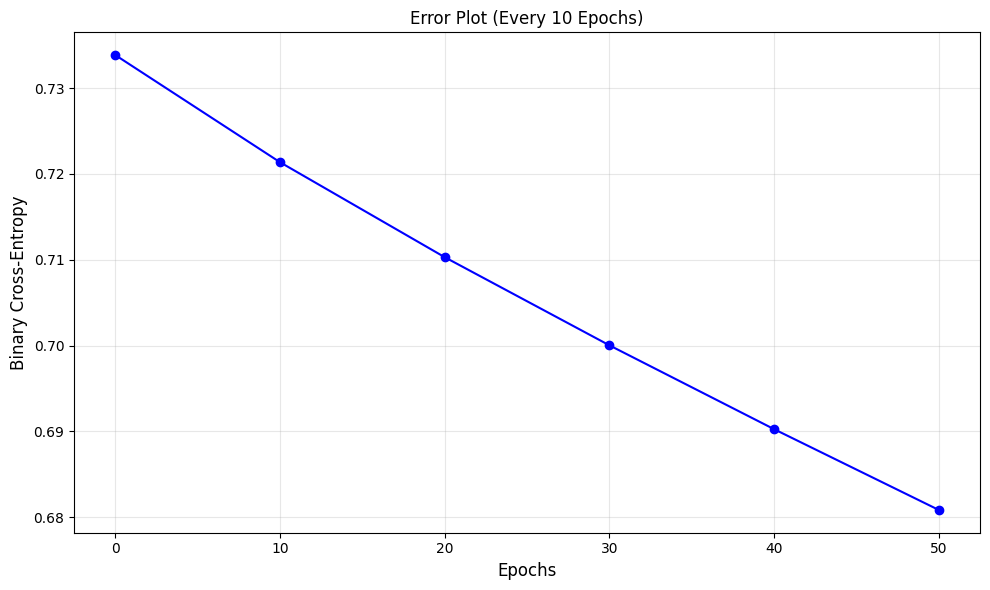
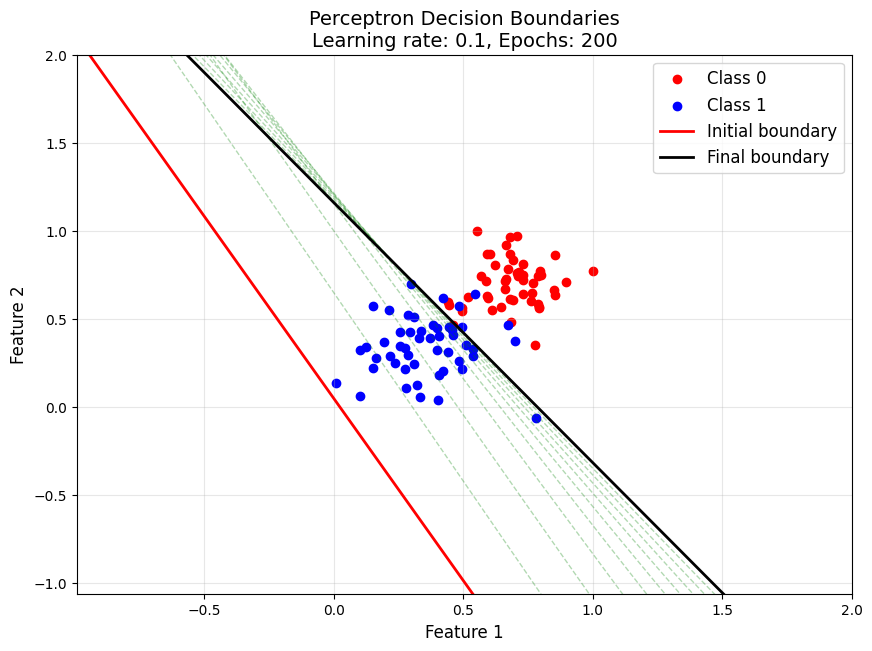
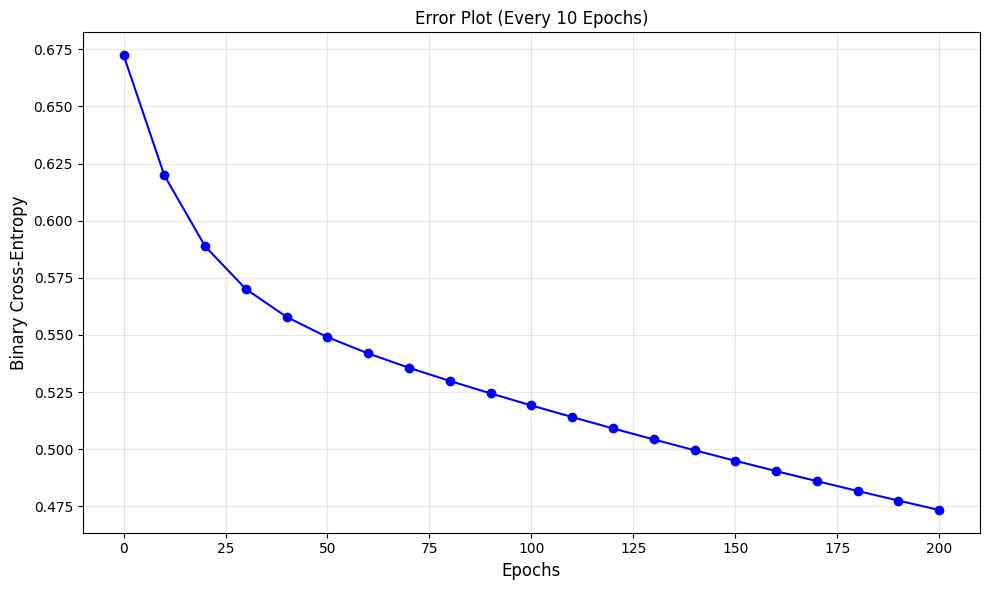

- Epoch 50: Underfitting, high loss.
- Epoch 100: Balanced learning.
- Epoch 200: Slight improvement, diminishing returns.


### Results Table

| Learning Rate | Epochs | Final Weights      | Final Bias | Final Loss |
| ------------- | ------ | ------------------ | ---------- | ---------- |
| 0.01          | 100    | [1.4314, -1.1076]  | -0.0625    | 0.7213     |
| 0.1           | 100    | [0.8021, -0.9818]  | -0.1373    | 0.6821     |
| 1.0           | 100    | [-3.5249, -3.1071] | 3.3478     | 0.3234     |
| 0.1           | 50     | [-0.4394, 0.1654]  | -0.1184    | 0.6808     |
| 0.1           | 200    | [-1.9050, -1.2881] | 1.4938     | 0.4734     |

---

## Conclusion

- **Heuristic Perceptron** is simple and intuitive, suitable for small datasets.
- **Gradient Descent Perceptron** offers smoother convergence and loss tracking.
- Learning rate and number of epochs significantly affect convergence quality.
- Gradient descent outperforms heuristic in terms of training stability and loss reduction.





